<a href="https://colab.research.google.com/github/DrTihami/Ninjacart-CNN-Business-Project/blob/main/Ninjacart_CV_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Problem Statement & Objective

Objective: The goal is to create a model that accurately classifies images of vegetables
 (tomato, onion, and potato) or marks them as noise.
Business Importance: Correct classification ensures smooth delivery from farm to business,
enabling Ninjacart to supply the right produce in a timely manner.

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Install gdown for Google Drive downloads
!pip install -q gdown

# Use gdown to download the file from Google Drive
!gdown --id 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

# If the downloaded file is a zip file, unzip it
import zipfile

# Assuming the file is called 'vegetable_photos.zip'
with zipfile.ZipFile('ninjacart_data.zip', 'r') as zip_ref:
    zip_ref.extractall('ninjacart_data')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=1c1638a3-a6c0-46a9-9441-61366bba2646
To: /content/ninjacart_data.zip
100% 275M/275M [00:02<00:00, 119MB/s] 


In [ ]:
import tensorflow as tf

# Load dataset using the directory where it was extracted
data_dir = 'ninjacart_data'
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=64
)

# Check class names
class_names = train_dataset.class_names
print("Classes:", class_names)

Found 3486 files belonging to 1 classes.
Classes: ['ninjacart_data']


In [ ]:
import os

# Check the directory structure
data_dir = 'ninjacart_data'

# List the contents of the data directory
for root, dirs, files in os.walk(data_dir):
    print(f"Root: {root}, Directories: {dirs}, Files: {len(files)}")

Root: ninjacart_data, Directories: ['ninjacart_data'], Files: 0
Root: ninjacart_data/ninjacart_data, Directories: ['train', 'test'], Files: 0
Root: ninjacart_data/ninjacart_data/train, Directories: ['tomato', 'potato', 'indian market', 'onion'], Files: 0
Root: ninjacart_data/ninjacart_data/train/tomato, Directories: [], Files: 789
Root: ninjacart_data/ninjacart_data/train/potato, Directories: [], Files: 898
Root: ninjacart_data/ninjacart_data/train/indian market, Directories: [], Files: 599
Root: ninjacart_data/ninjacart_data/train/onion, Directories: [], Files: 849
Root: ninjacart_data/ninjacart_data/test, Directories: ['tomato', 'potato', 'indian market', 'onion'], Files: 0
Root: ninjacart_data/ninjacart_data/test/tomato, Directories: [], Files: 106
Root: ninjacart_data/ninjacart_data/test/potato, Directories: [], Files: 81
Root: ninjacart_data/ninjacart_data/test/indian market, Directories: [], Files: 81
Root: ninjacart_data/ninjacart_data/test/onion, Directories: [], Files: 83


In [ ]:
import tensorflow as tf

# Define the paths to the training and testing directories
train_dir = 'ninjacart_data/ninjacart_data/train'
test_dir = 'ninjacart_data/ninjacart_data/test'

# Load the training data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),  # Adjust size as needed
    batch_size=64,
    label_mode='int'  # Labels are integer-encoded
)

# Load the test data
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),  # Ensure size matches training
    batch_size=64,
    label_mode='int'  # Labels are integer-encoded
)

# Check the class names to ensure everything is working
print("Classes in the training set:", train_dataset.class_names)
print("Classes in the test set:", test_dataset.class_names)

Found 3135 files belonging to 4 classes.
Found 351 files belonging to 4 classes.
Classes in the training set: ['indian market', 'onion', 'potato', 'tomato']
Classes in the test set: ['indian market', 'onion', 'potato', 'tomato']


In [ ]:
len(train_dir)

35

In [ ]:
len(test_dir)

34

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Correct base directory
base_dir = './ninjacart_data/ninjacart_data'
train_dir = os.path.join(base_dir, 'train')

# List of categories (subfolders)
categories = os.listdir(train_dir)

--- Category: tomato ---
Image: tomato799.png, Dimensions: (500, 400)
Image: tomato862.png, Dimensions: (400, 500)
Image: tomato874.png, Dimensions: (400, 500)
Image: tomato293.png, Dimensions: (500, 400)
Image: tomato422.png, Dimensions: (500, 400)
--- Category: potato ---
Image: potato11147 (2).jpeg, Dimensions: (275, 183)
Image: potato11294.jpeg, Dimensions: (225, 225)
Image: potato11109 (1).jpeg, Dimensions: (275, 183)
Image: potato11248.jpeg, Dimensions: (256, 197)
Image: potato11050 (1).jpeg, Dimensions: (275, 183)
--- Category: indian market ---
Image: market11408.png, Dimensions: (48, 48)
Image: photo-1639575668833-563e2b735e77.jpeg, Dimensions: (870, 580)
Image: market11329.jpeg, Dimensions: (300, 168)
Image: photo-1496938498205-cfb8381042c3.jpeg, Dimensions: (1032, 581)
Image: market11151.jpeg, Dimensions: (262, 192)
--- Category: onion ---
Image: onion11165.jpeg, Dimensions: (318, 159)
Image: onion11009 (1).jpeg, Dimensions: (300, 168)
Image: onion1176.jpeg, Dimensions: (297

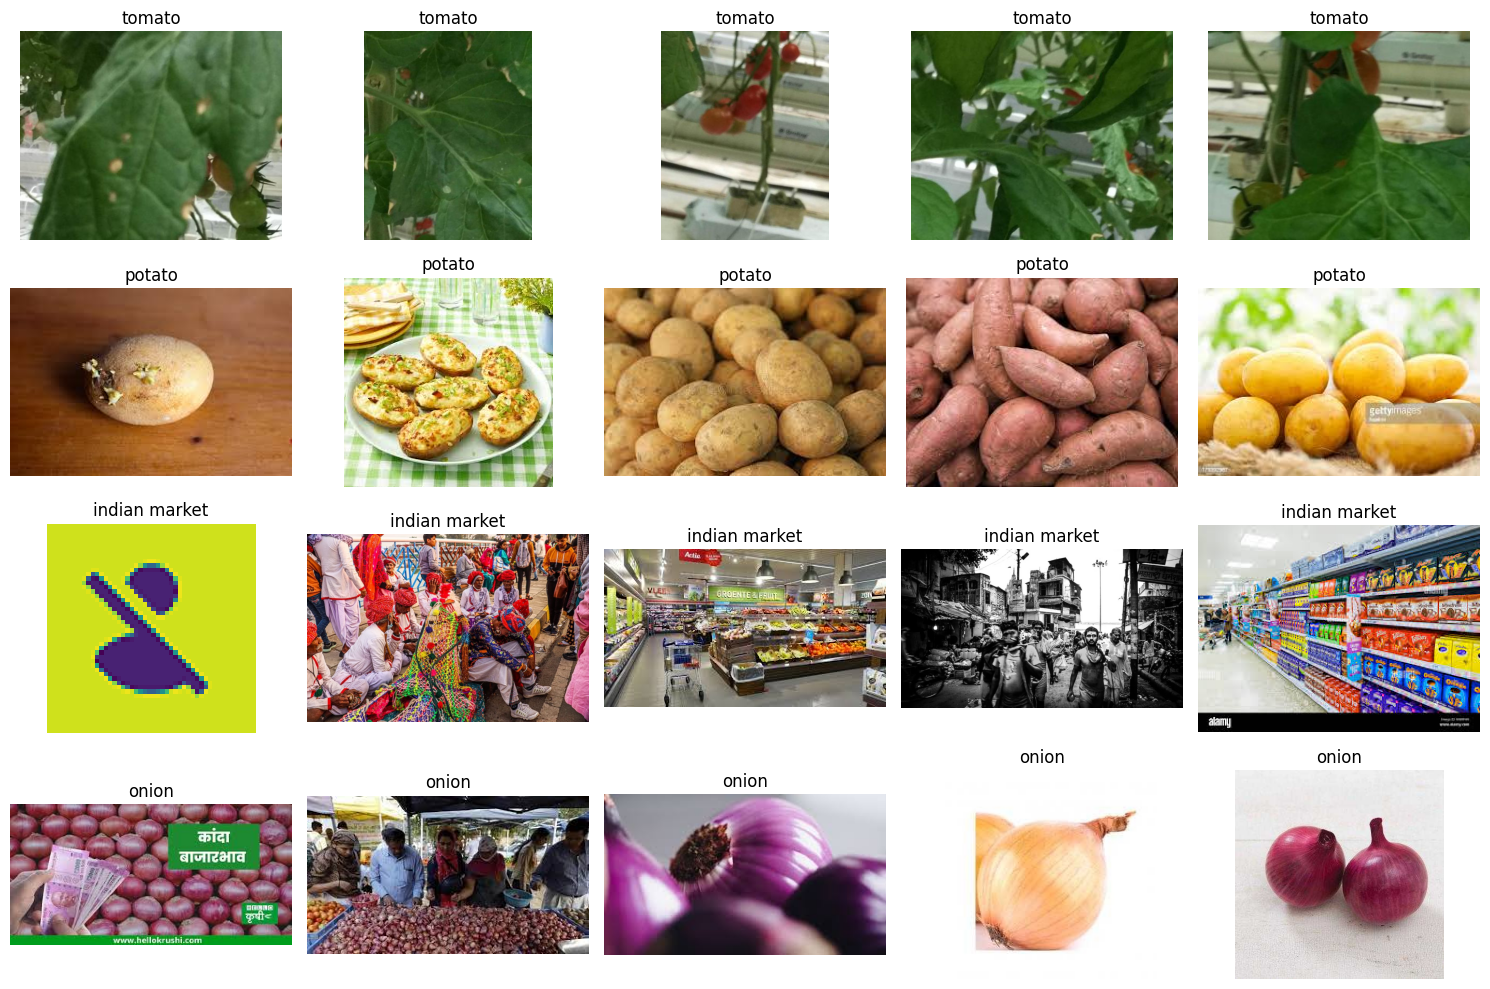

In [ ]:
# Function to visualize images and print their dimensions
def visualize_images_and_dimensions(directory, categories, num_images=5):
    plt.figure(figsize=(15, 10))

    for category in categories:
        category_path = os.path.join(directory, category)
        images = os.listdir(category_path)

        print(f"--- Category: {category} ---")

        for i in range(num_images):  # Display 'num_images' images per category
            img_path = os.path.join(category_path, images[i])

            # Load image using PIL and print dimensions
            img = Image.open(img_path)
            print(f"Image: {images[i]}, Dimensions: {img.size}")

            # Plot the image
            plt.subplot(len(categories), num_images, categories.index(category) * num_images + i + 1)
            plt.imshow(img)
            plt.title(f"{category}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize images and their dimensions
visualize_images_and_dimensions(train_dir, categories, num_images=5)

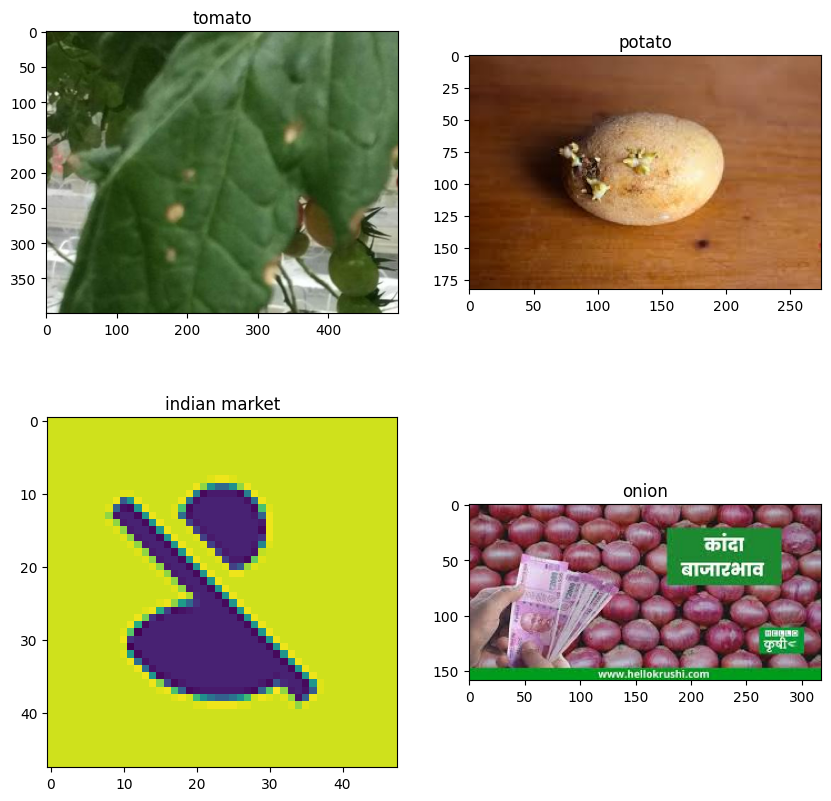

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_sample_images(directory, categories):
    plt.figure(figsize=(10, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        # Pick a random image from the folder
        sample_image = os.listdir(category_path)[0]
        img = mpimg.imread(os.path.join(category_path, sample_image))
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(category)
    plt.show()

# Categories in the training set (folders)
categories = os.listdir(train_dir)

# Visualize sample images from the training set
visualize_sample_images(train_dir, categories)


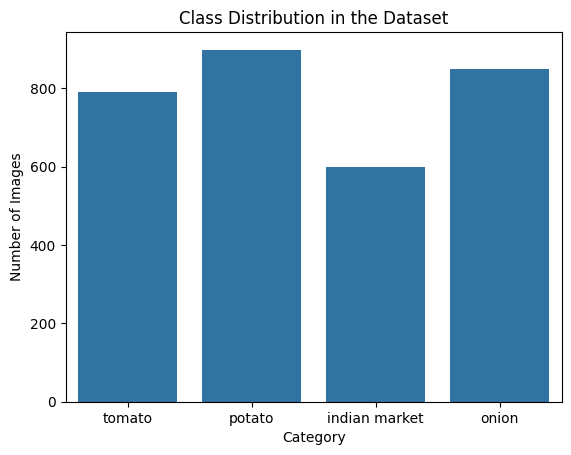

In [ ]:
import seaborn as sns

def plot_class_distribution(directory, categories):
    class_counts = []
    for category in categories:
        class_counts.append(len(os.listdir(os.path.join(directory, category))))

    # Plot the distribution using seaborn
    sns.barplot(x=categories, y=class_counts)
    plt.title('Class Distribution in the Dataset')
    plt.ylabel('Number of Images')
    plt.xlabel('Category')
    plt.show()

# Plot the distribution for the training set
plot_class_distribution(train_dir, categories)


# Data Augmentation and Data Preparation for Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # 80-20 split for validation
)

test_datagen = ImageDataGenerator(rescale=1./255,)

# Load Train, Validation, and Test Data
batch_size = 64
img_size = (224, 224)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.


# Model Building

In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())


# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax')) # 4 categories (Tomato, Potato, Onion, Noise)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 111, 111, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 54, 54, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,795,668 (10.66 MB)

 Trainable params: 2,795,444 (10.66 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model.fit(train_data, validation_data=validation_data, epochs=5)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 216s 5s/step - accuracy: 0.3830 - loss: 3.7399 - val_accuracy: 0.2981 - val_loss: 1.5203
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 195s 5s/step - accuracy: 0.4766 - loss: 2.4486 - val_accuracy: 0.2516 - val_loss: 1.4044
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.4994 - loss: 1.8023 - val_accuracy: 0.3173 - val_loss: 1.3833
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 208s 5s/step - accuracy: 0.5130 - loss: 1.5736 - val_accuracy: 0.4487 - val_loss: 1.3686
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.5660 - loss: 1.2265 - val_accuracy: 0.4135 - val_loss: 1.3358


# Early Stopping

In [ ]:
# EarlyStopping and ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, save_weights_only=False)

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.6485 - loss: 0.9344 - val_accuracy: 0.5064 - val_loss: 1.2212
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 220s 5s/step - accuracy: 0.6632 - loss: 0.9264 - val_accuracy: 0.4904 - val_loss: 1.9857
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 216s 5s/step - accuracy: 0.6540 - loss: 0.9261 - val_accuracy: 0.5304 - val_loss: 1.3775
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 239s 5s/step - accuracy: 0.6763 - loss: 0.8668 - val_accuracy: 0.6106 - val_loss: 0.9490
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.7125 - loss: 0.7636 - val_accuracy: 0.6458 - val_loss: 0.9326
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.6912 - loss: 0.7999 - val_accuracy: 0.6234 - val_loss: 1.0923
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.7021 - loss: 0.7845 - val_accuracy: 0.5529 - val_loss: 1.1458
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.6904 - loss: 0.8028 - val_accuracy: 0.6939 - v

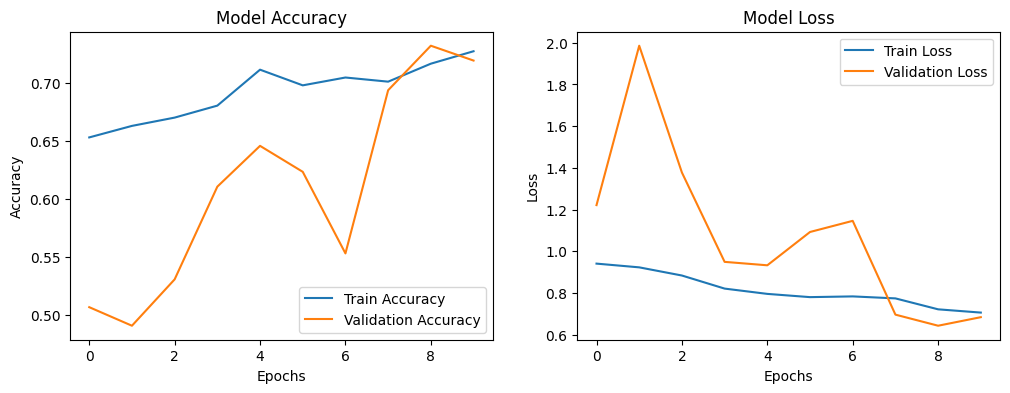

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Selecting Best Model

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 919ms/step - accuracy: 0.6851 - loss: 0.7404
Test Accuracy: 74.64%


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 944ms/step


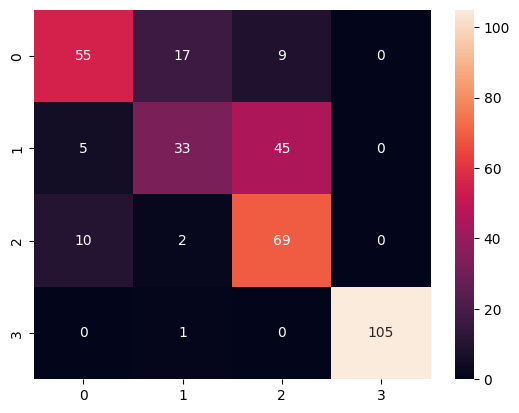

               precision    recall  f1-score   support

       tomato       0.79      0.68      0.73        81
       potato       0.62      0.40      0.49        83
indian market       0.56      0.85      0.68        81
        onion       1.00      0.99      1.00       106

     accuracy                           0.75       351
    macro avg       0.74      0.73      0.72       351
 weighted avg       0.76      0.75      0.74       351



In [ ]:
# Load best model
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
y_pred = best_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))

# Transfer Learning

# **MobileNet**

In [ ]:
# Using Pre-trained MobileNet
from tensorflow.keras.applications import MobileNetV2
pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezing the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Building the model using transfer learning
model_tl = Sequential([
    pretrained_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# Compile
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the transfer learned model
history_tl = model_tl.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=[early_stop, model_checkpoint]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.3773 - loss: 3.7682 - val_accuracy: 0.6619 - val_loss: 0.8806
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.6351 - loss: 1.0889 - val_accuracy: 0.8814 - val_loss: 0.4236
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.7450 - loss: 0.8684 - val_accuracy: 0.9006 - val_loss: 0.3493
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.7759 - loss: 0.6138 - val_accuracy: 0.8654 - val_loss: 0.3651
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.7998 - loss: 0.4920 - val_accuracy: 0.9054 - val_loss: 0.2795
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.8172 - loss: 0.4231 - val_accuracy: 0.9167 - val_loss: 0.2853
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.8407 - loss: 0.3950 - val_accuracy: 0.9199 - val_loss: 0.2480
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy:

# Plotting of Accuracies

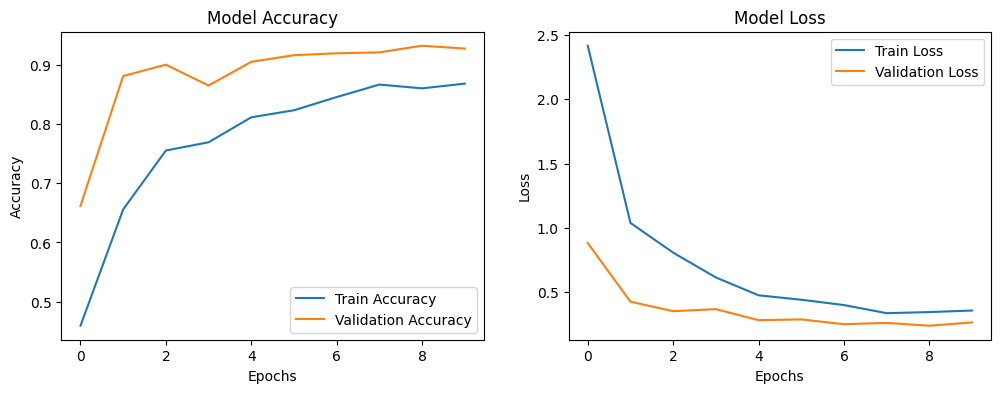

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8799 - loss: 0.4215
Test Accuracy: 90.88%


6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step


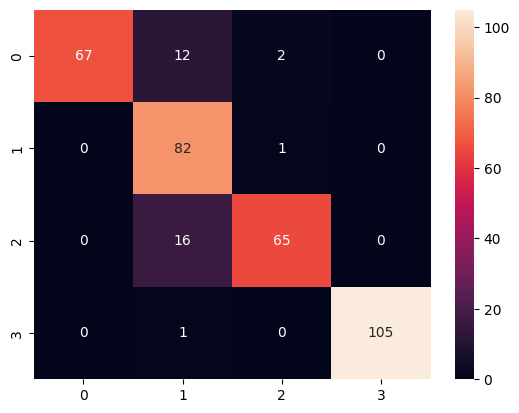

               precision    recall  f1-score   support

       tomato       1.00      0.83      0.91        81
       potato       0.74      0.99      0.85        83
indian market       0.96      0.80      0.87        81
        onion       1.00      0.99      1.00       106

     accuracy                           0.91       351
    macro avg       0.92      0.90      0.90       351
 weighted avg       0.93      0.91      0.91       351



In [ ]:
# Evaluate on test data
test_loss, test_acc = model_tl.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
y_pred = model_tl.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))

# **VGG16**

In [ ]:
# Using Pre-trained VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pre-trained VGG16 model (without the top fully connected layers)
pretrained_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Building the model using transfer learning
model_tl_VGG = Sequential([
    pretrained_model,        # Pre-trained VGG16 model
    Flatten(),               # Flatten the output of VGG16
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.3),            # Dropout for regularization
    Dense(16, activation='relu'),  # Another fully connected layer
    Dropout(0.3),            # Dropout for regularization
    Dense(4, activation='softmax') # Final output layer for 4 classes
])

# Compile the model
model_tl_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_vgg16.keras', save_best_only=True, save_weights_only=False)

# Train the model
history_tl_VGG = model_tl_VGG.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/40 ━━━━━━━━━━━━━━━━━━━━ 22:35 44s/step - accuracy: 0.3069 - loss: 1.8322

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tl_VGG.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl_VGG.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_tl_VGG.history['loss'], label='Train Loss')
plt.plot(history_tl_VGG.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Evaluate on test data
test_loss, test_acc = model_tl_VGG.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
y_pred = model_tl_VGG.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))

# **RESNET**

In [ ]:
# Using Pre-trained VGG16
from tensorflow.keras.applications import ResNet50
pretrained_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezing the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Building the model using transfer learning
model_tl_ResNet = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),  # Better for reducing overfitting than Flatten()
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# Compile
model_tl_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_resnet50.keras', save_best_only=True, save_weights_only=False)

# Train the transfer learned model
history_tl_ResNet = model_tl_ResNet.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=[early_stop, model_checkpoint]
)

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tl_ResNet.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl_ResNet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_tl_ResNet.history['loss'], label='Train Loss')
plt.plot(history_tl_ResNet.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Evaluate on test data
test_loss, test_acc = model_tl_ResNet.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
y_pred = model_tl_ResNet.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))

In [ ]:
!pip install -q tensorflow

In [ ]:
# Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # 80-20 split for validation
)

test_datagen = ImageDataGenerator(rescale=1./255,)

# Load Train, Validation
batch_size = 64
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define log directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


# Model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())
# fully connected layers
model.add(Dense(64, activation='relu'))
# apply Dropout layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax')) # 4 categories (Tomato, Potato, Onion, Noise)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


# Train the model with TensorBoard callback
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[tensorboard_callback],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,918,708 (91.24 MB)

 Trainable params: 23,918,516 (91.24 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 341s 8s/step - accuracy: 0.3423 - loss: 15.6361 - val_accuracy: 0.3767 - val_loss: 1.2863
Epoch 2/10
 1/39 ━━━━━━━━━━━━━━━━━━━━ 4:20 7s/step - accuracy: 0.4219 - loss: 9.5626

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.4219 - loss: 9.5626 - val_accuracy: 0.3958 - val_loss: 1.2247
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 318s 8s/step - accuracy: 0.4156 - loss: 5.9629 - val_accuracy: 0.2552 - val_loss: 1.4101
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.4531 - loss: 3.9188 - val_accuracy: 0.2292 - val_loss: 1.4272
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 312s 8s/step - accuracy: 0.4722 - loss: 3.2772 - val_accuracy: 0.4201 - val_loss: 1.2699
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.4844 - loss: 3.1175 - val_accuracy: 0.5000 - val_loss: 1.2969
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.4329 - loss: 2.8229 - val_accuracy: 0.2552 - val_loss: 4.5306
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.4219 - loss: 2.6972 - val_accuracy: 0.2083 - val_loss: 4.0844
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 307s 8s/step - accuracy: 0.4801 - loss: 2.3882 - val_accuracy: 0.2483 - val_

In [ ]:
%load_ext tensorboard
log_folder = log_dir

In [ ]:
%tensorboard --logdir={log_folder} --port=6007

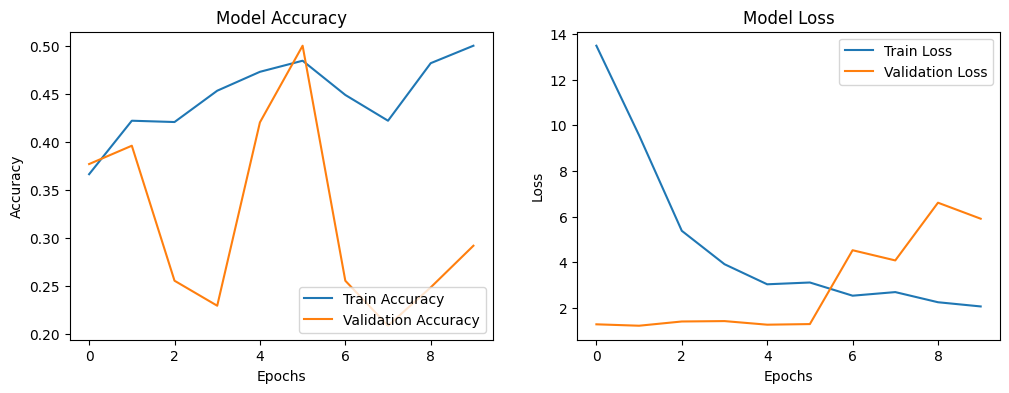

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6851 - loss: 0.7404
Test Accuracy: 74.64%
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 958ms/step


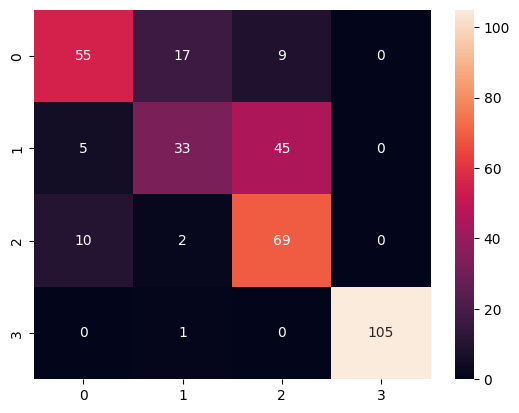

               precision    recall  f1-score   support

       tomato       0.79      0.68      0.73        81
       potato       0.62      0.40      0.49        83
indian market       0.56      0.85      0.68        81
        onion       1.00      0.99      1.00       106

     accuracy                           0.75       351
    macro avg       0.74      0.73      0.72       351
 weighted avg       0.76      0.75      0.74       351



In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix and Classification Report
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))

# **Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


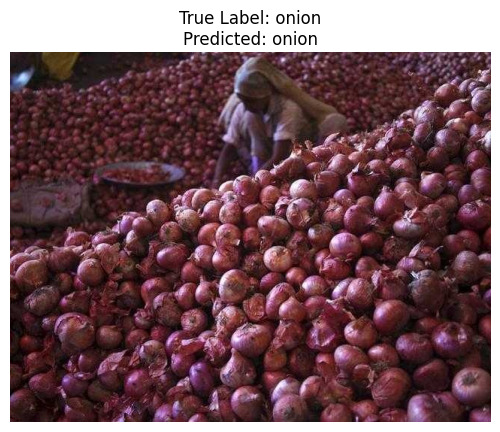

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the path to the test directory and class labels
test_dir = 'ninjacart_data/ninjacart_data/test'
class_labels = ['indian market', 'onion', 'potato', 'tomato']

# Function to load and preprocess a random image from the test set
def load_random_image(test_dir):
    category = np.random.choice(class_labels)
    category_dir = os.path.join(test_dir, category)
    img_name = np.random.choice(os.listdir(category_dir))
    img_path = os.path.join(category_dir, img_name)

    img = image.load_img(img_path, target_size=(224, 224))  # Resizing to match MobileNetV2 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    return img_array, img_path, category

# Function to make predictions and display the image with its predicted label
def predict_random_image(model, test_dir):
    img_array, img_path, true_label = load_random_image(test_dir)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    plt.imshow(image.load_img(img_path))  # Display the image
    plt.axis('off')
    plt.title(f"True Label: {true_label}\nPredicted: {class_labels[predicted_class[0]]}")
    plt.show()

# Predict a random image from the test set
predict_random_image(model_tl, test_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


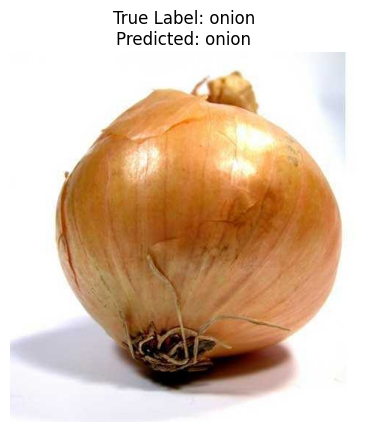

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


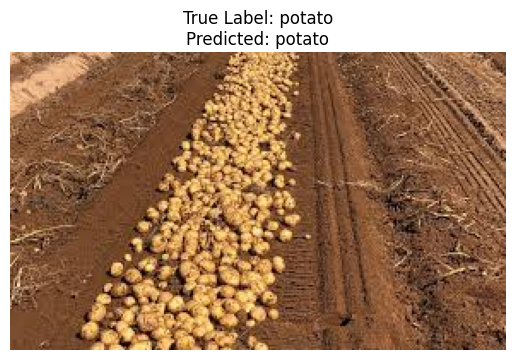

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


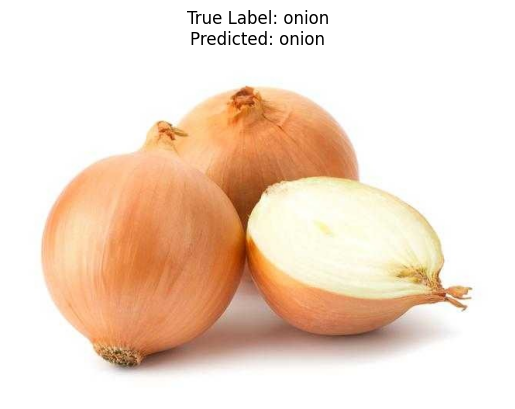

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


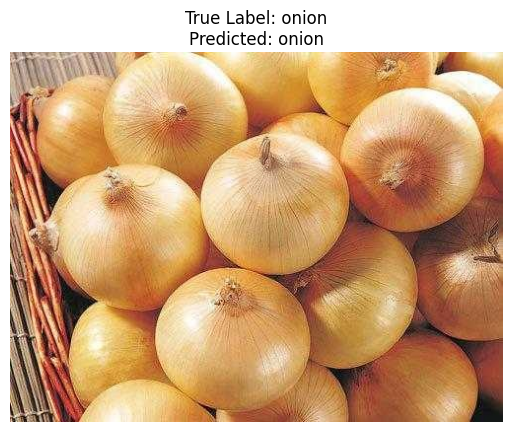

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


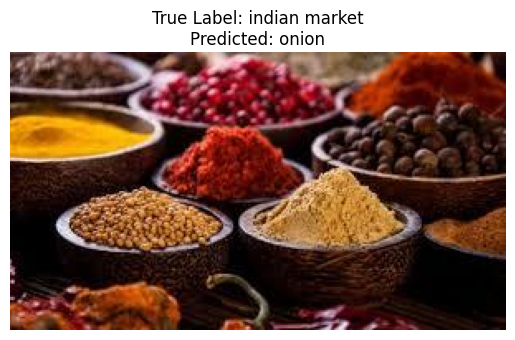

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


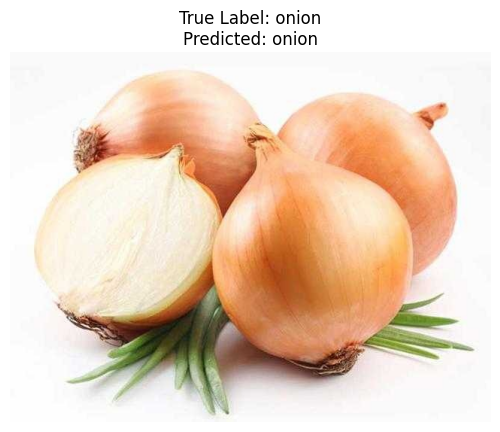

In [ ]:
# Predict a random image from the test set
predict_random_image(model_tl, test_dir)

**Summary & Insights**

There are 3135 images in train category and 351 images in test category.

After validation split, there atre 2511 train images and 624 images in validation set.

There are four categories/classes of images both in train and test sets, tomato, Onion, Potato, Indian Market.

The images vary in their sizes therefore we have to resize or rescale these images.

The loss and accuracy for test is high and not smooth for lower epoch numbers for newly created CNN models.

But the loss and accuracy for test is low and smooth for lower epoch numbers for pre-trained mobilenet CNN model.

Many of our newly created models performed poorly at low epoch numbers.

The pre-trained model performed better than all other models.


In [ ]:
# Model Architecture
model1 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

history1 = model1.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 350s 8s/step - accuracy: 0.3066 - loss: 1.3671 - val_accuracy: 0.3558 - val_loss: 1.3418
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 380s 9s/step - accuracy: 0.4171 - loss: 1.3148 - val_accuracy: 0.3974 - val_loss: 1.2757
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 349s 9s/step - accuracy: 0.4649 - loss: 1.2272 - val_accuracy: 0.5593 - val_loss: 1.1492
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 351s 9s/step - accuracy: 0.6066 - loss: 1.0717 - val_accuracy: 0.6426 - val_loss: 1.0040
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 346s 8s/step - accuracy: 0.7155 - loss: 0.8823 - val_accuracy: 0.6715 - val_loss: 0.8548
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 398s 9s/step - accuracy: 0.7303 - loss: 0.7653 - val_accuracy: 0.6891 - val_loss: 0.8032
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 378s 9s/step - accuracy: 0.7592 - loss: 0.7055 - val_accuracy: 0.7003 - val_loss: 0.7572
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 373s 9s/step - accuracy: 0.7723 - loss: 0.6695 - val_accuracy: 0.7019 - v

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-e8bb067bbb29>", line 19, in <cell line: 19>
    history1 = model1.fit(train_data, epochs=20, validation_data=validation_data)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 317, in fit
    callbacks.on_train_batch_begin(step)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py", line 98, in on_train_batch_begin
    def on_train_batch_begin(self, batch, logs=None):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/inte

TypeError: object of type 'NoneType' has no len()